In [14]:
# Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [15]:
# Load Dataset
df = pd.read_csv('/kaggle/input/salary-data-csv/Salary_Data.csv')
df.dropna(inplace=True)

In [16]:
# Reduce Job Titles (less than 25 counts -> "Others")
job_counts = df['Job Title'].value_counts()
rare_jobs = job_counts[job_counts <= 25].index
df['Job Title'] = df['Job Title'].apply(lambda x: 'Others' if x in rare_jobs else x)


In [17]:
# Clean Education Levels
df['Education Level'].replace({
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "phD": "PhD"
}, inplace=True)

In [18]:

# Encode Education Level numerically
education_map = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
df['Education Level'] = df['Education Level'].map(education_map)

In [19]:
# Label Encode Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [20]:
# One-Hot Encode Job Title
job_dummies = pd.get_dummies(df['Job Title'], drop_first=True)
df = pd.concat([df.drop('Job Title', axis=1), job_dummies], axis=1)

In [21]:
# Split Features and Target
X = df.drop('Salary', axis=1)
y = df['Salary']

In [22]:
# Split into Train and Test Sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
# Model Dictionary
model_params = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [2, 4, 6, 8, 10],
            'random_state': [0, 42],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 20, 30, 50]
        }
    }
}

In [24]:
# Grid Search for Best Model
scores = []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='neg_mean_squared_error')
    clf.fit(x_train, y_train)
    scores.append({
        'Model': model_name,
        'Best Params': clf.best_params_,
        'MSE': -clf.best_score_
    })

score_df = pd.DataFrame(scores)
print(score_df.sort_values(by='MSE'))

               Model                                        Best Params  \
2      Random Forest                               {'n_estimators': 50}   
1      Decision Tree  {'max_depth': 10, 'min_samples_split': 2, 'ran...   
0  Linear Regression                                                 {}   

            MSE  
2  6.860720e+07  
1  1.512974e+08  
0  4.642012e+08  


In [25]:
# Train and Evaluate Each Model Separately

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=20)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
rf_r2 = rf.score(x_test, y_test)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

In [26]:
# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=2, random_state=0)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
dt_r2 = dt.score(x_test, y_test)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)

In [27]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
lr_r2 = lr.score(x_test, y_test)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)

In [28]:
# Print Results
print("\nRandom Forest Performance:")
print("R² Score:", rf_r2)
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)

print("\nDecision Tree Performance:")
print("R² Score:", dt_r2)
print("MAE:", dt_mae)
print("RMSE:", dt_rmse)

print("\nLinear Regression Performance:")
print("R² Score:", lr_r2)
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)


Random Forest Performance:
R² Score: 0.971894657146182
MAE: 3422.0230755583184
RMSE: 8951.879397280905

Decision Tree Performance:
R² Score: 0.9412718508060915
MAE: 7646.740239931774
RMSE: 12940.258020995701

Linear Regression Performance:
R² Score: 0.8329414604682001
MAE: 15753.355437075003
RMSE: 21824.99329731013


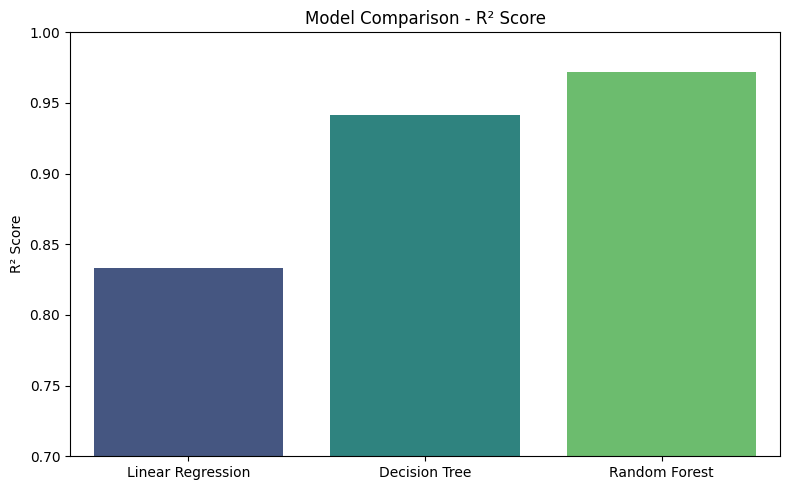

In [29]:
# Plotting Model Comparison
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [lr_r2, dt_r2, rf_r2]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=r2_scores, palette='viridis')
plt.title('Model Comparison - R² Score')
plt.ylim(0.7, 1.0)
plt.ylabel('R² Score')
plt.tight_layout()
plt.show()
